In [1]:
import pandas as pd
import os
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import glob

#### Data Preparation: Historical County Level Temperature Data
##### Find 50-year mean annual temperatures for each county and join to 2021 forest cover data

In [23]:
nb_path = pathlib.Path().resolve()
filepath = nb_path / 'temps'        # ???gives unexpected file path???

In [25]:
# concatenate csv files into one file and export to csv
all_filenames = [i for i in glob.glob(os.path.join(filepath,'*.csv'))]
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
combined_csv.to_csv( os.path.join(filepath,"all_county_temps.csv"), index=False, encoding='utf-8-sig')

In [68]:
# read in and format concatenated csv
temps = pd.read_csv(os.path.join(filepath,'all_county_temps.csv'))

temps['Date'] = temps['Date'].astype(str).str[:4]           # reformat dates
temps['Value'] = np.around(temps['Value'] - 32 * (5/9),2)   # convert fahrenheit to celsius
temps['County'] = temps['County'].str.split(' ').str[0]    # remove 'county' from county name column

# temps.to_csv(os.path.join(filepath,'all_county_temps_formatted.csv'))   # read formatted temperature file to csv

In [72]:
temps.head()

,County,Date,Value
0,Androscoggin,1970,25.62
1,Androscoggin,1971,25.52
2,Androscoggin,1972,24.12
3,Androscoggin,1973,27.42
4,Androscoggin,1974,25.32


#### Find 50-year mean temperature for each county

In [73]:
grouped = temps.groupby('County')                 # group by county
means = pd.DataFrame(grouped['Value'].mean())    # create new dataframe with mean temp for each county

# means.to_csv(os.path.join(filepath,'50_yr_mean_temps.csv'))   # read mean temp file to csv

In [88]:
means.head()

,Value
County,
Androscoggin,26.683462
Aroostook,21.066154
Cumberland,27.402692
Franklin,21.864231
Hancock,26.439231


#### Join mean temperature file with 2021 forest cover data

In [95]:
# read in forest cover csv

forest_2021 = pd.read_csv(os.path.join(nb_path / 'forest_cover','2021_forestcover_formatted.csv'))

In [96]:
forest_2021['COUNTY'] = forest_2021['COUNTY'].str.strip()    # reformat county name
forest_2021.set_index('COUNTY',inplace=True)    # set county column to index

merged = forest_2021.merge(means, left_index = True, right_index = True)     # merge mean temps with forest cover data
merged.rename(columns={'Value': '50_yr_mean_temp'},inplace=True)   # rename values column to '50_yr_mean_temp'

# merged.to_csv(os.path.join(filepath,'2021_forest_cover_w_50yr_mean_temps.csv'))   # read merged df to csv

<AxesSubplot: xlabel='50_yr_mean_temp', ylabel='Balsam fir'>

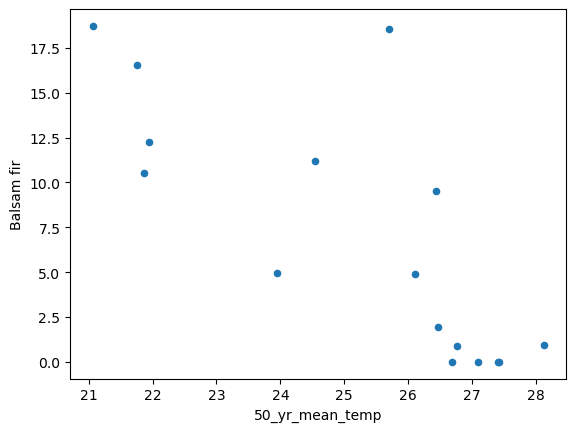

In [113]:
merged.plot(x='50_yr_mean_temp',y='Balsam fir',kind='scatter')   # plot relationship between species and temperature